In [1]:
#Include documentation for moons class
from moons import Moons

<Axes: xlabel='period_days', ylabel='distance_km'>

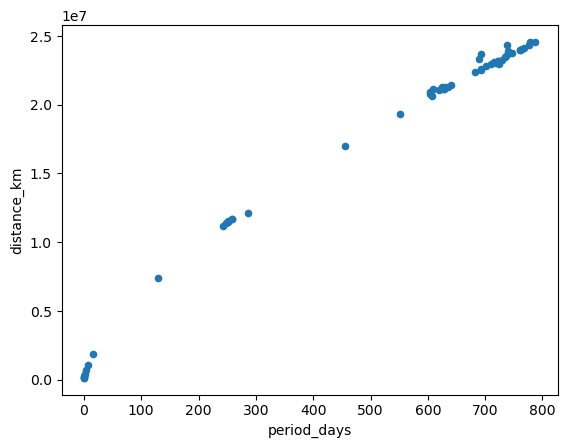

In [38]:
test = Moons()
test.data.head()

test.data.plot("period_days","distance_km", "scatter")

#test.data.groupby("group").mean()
